In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/jigsaw-agile-community-rules/sample_submission.csv
/kaggle/input/jigsaw-agile-community-rules/train.csv
/kaggle/input/jigsaw-agile-community-rules/test.csv


# DATA

In [2]:
df_train = pd.read_csv('/kaggle/input/jigsaw-agile-community-rules/train.csv')
df_test = pd.read_csv('/kaggle/input/jigsaw-agile-community-rules/test.csv')

df_rules = pd.read_csv('/kaggle/input/jigsaw-agile-community-rules/sample_submission.csv')

df_train.head()

,row_id,body,rule,subreddit,positive_example_1,positive_example_2,negative_example_1,negative_example_2,rule_violation
0,0,Banks don't want you to know this! Click here ...,"No Advertising: Spam, referral links, unsolici...",Futurology,If you could tell your younger self something ...,hunt for lady for jack off in neighbourhood ht...,Watch Golden Globe Awards 2017 Live Online in ...,"DOUBLE CEE x BANDS EPPS - ""BIRDS""\n\nDOWNLOAD/...",0
1,1,SD Stream [ ENG Link 1] (http://www.sportsstre...,"No Advertising: Spam, referral links, unsolici...",soccerstreams,[I wanna kiss you all over! Stunning!](http://...,LOLGA.COM is One of the First Professional Onl...,#Rapper \n🚨Straight Outta Cross Keys SC 🚨YouTu...,[15 Amazing Hidden Features Of Google Search Y...,0
2,2,Lol. Try appealing the ban and say you won't d...,No legal advice: Do not offer or request legal...,pcmasterrace,Don't break up with him or call the cops. If ...,It'll be dismissed: https://en.wikipedia.org/w...,Where is there a site that still works where y...,Because this statement of his is true. It isn'...,1
3,3,she will come your home open her legs with an...,"No Advertising: Spam, referral links, unsolici...",sex,Selling Tyrande codes for 3€ to paypal. PM. \n...,tight pussy watch for your cock get her at thi...,NSFW(obviously) http://spankbang.com/iy3u/vide...,Good News ::Download WhatsApp 2.16.230 APK for...,1
4,4,code free tyrande --->>> [Imgur](http://i.imgu...,"No Advertising: Spam, referral links, unsolici...",hearthstone,wow!! amazing reminds me of the old days.Well...,seek for lady for sex in around http://p77.pl/...,must be watch movie https://sites.google.com/s...,We're streaming Pokemon Veitnamese Crystal RIG...,1


In [3]:
df_train['rule_violation'].value_counts(normalize=True)

rule_violation
1    0.508132
0    0.491868
Name: proportion, dtype: float64

In [4]:
df_train.isnull().sum()

row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
rule_violation        0
dtype: int64

In [5]:
df_train['body_length'] = df_train['body'].apply(len)
df_train['body_length'].describe()

count    2029.00000
mean      176.84278
std       113.62391
min        51.00000
25%        87.00000
50%       138.00000
75%       238.00000
max       499.00000
Name: body_length, dtype: float64

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
X = vectorizer.fit_transform(df_train['body'])
y = df_train['rule_violation']

# Model
model = LogisticRegression(max_iter=1000)
auc = cross_val_score(model, X, y, cv=5, scoring='roc_auc')
print("Mean AUC:", auc.mean())


Mean AUC: 0.8091725588922051


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

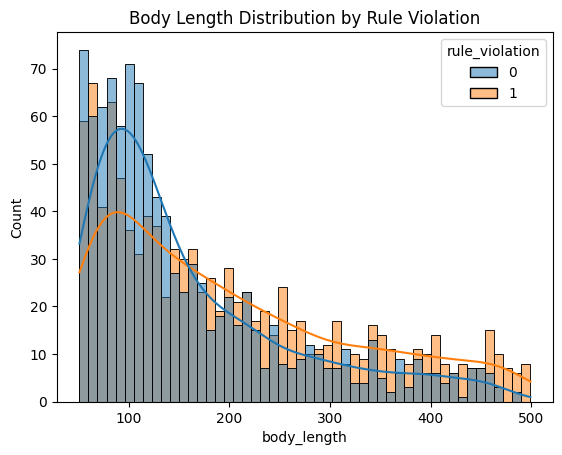

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_train, x='body_length', hue='rule_violation', bins=50, kde=True)
plt.title("Body Length Distribution by Rule Violation")
plt.show()

In [8]:
# Test verisini dönüştür
X_test = vectorizer.transform(df_test['body'])

# Modeli tüm veride yeniden eğit
model.fit(X, y)

# Olasılık tahminleri (rule_violation için)
y_test_pred = model.predict_proba(X_test)[:, 1]

# Submission dosyasını oluştur
submission = pd.DataFrame({
    'row_id': df_test['row_id'],
    'rule_violation': y_test_pred
})
submission.to_csv('submission.csv', index=False)

print("✅ submission.csv başarıyla oluşturuldu.")

✅ submission.csv başarıyla oluşturuldu.
